# Eigenvalue problem: Coupled oscillators 
- by Börge Göbel
- Student GitHub: LopezBanos

In [2]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

![Coupled_oscillators](figure_08_coupled_oscillators.png)

\begin{align}
m\ddot{r}_1 &= -k(r_1-r_l-a) -k(r_1-r_2-a)\\
m\ddot{r}_2 &= -k(r_2-r_1-a) -k(r_2-r_3-a)\\
m\ddot{r}_3 &= -k(r_3-r_2-a) -k(r_3-r_r-a)
\end{align}

The constants can be dropped, since we can transform $ (r_1 - a) \rightarrow r_1$, $(r_2 - 2a) \rightarrow r_2$, $(r_3 - 3a) \rightarrow r_3 $, and use $r_l=0, r_r=4a$

\begin{align}
m\ddot{r}_1 &= -k(r_1) -k(r_1-r_2)\\
m\ddot{r}_2 &= -k(r_2-r_1) -k(r_2-r_3)\\
m\ddot{r}_3 &= -k(r_3-r_2) -k(r_3)
\end{align}

This is identical to

\begin{align}
\begin{pmatrix}\ddot{r}_1\\\ddot{r}_2\\\ddot{r}_3\end{pmatrix}=-\frac{k}{m}
\begin{pmatrix}2&-1&0\\-1&2&-1\\0&-1&2\end{pmatrix}
\begin{pmatrix}r_1\\ r_2\\ r_3\end{pmatrix}
\end{align}

We can, of course, solve this system of equations numerically. 

## 1. Solving the coupled differential equations numerically 

In [3]:
k = 1
m = 1

def f_3osc(t,y):
    r = y[0:3]
    v = y[3:6]
    eq1 = (2 * r[0] - r[1]) * (-k / m)
    eq2 = (-r[0] + 2 * r[1] - r[2]) * (-k / m)
    eq3 = (-r[1] + 2 * r[2]) * (-k / m)
    return [v[0], v[1], v[2], eq1, eq2, eq3]

In [4]:
tStart = 0
tEnd = 100
a = 1

yStart = 0.3 * (2 * np.random.rand(6) - 1) # Random Starting conditions

solution_3osc = integrate.solve_ivp(f_3osc, [tStart, tEnd], yStart, method="RK45", t_eval= np.linspace(tStart, tEnd, 1001))

Text(0, 0.5, 'Coordinates')

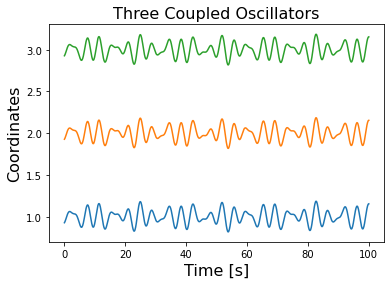

In [5]:
# PLOTTING SECTION
plt.plot(solution_3osc.t, solution_3osc.y[0] + 1*a)
plt.plot(solution_3osc.t, solution_3osc.y[0] + 2*a)
plt.plot(solution_3osc.t, solution_3osc.y[0] + 3*a)

plt.title("Three Coupled Oscillators", fontsize= 16)
plt.xlabel("Time [s]", fontsize= 16)
plt.ylabel("Coordinates", fontsize= 16)

## 2. The eigenvalue problem

### 2.1 Why is it an eigenvalue problem?

The equation for 3 oscillators was 

\begin{align}
\begin{pmatrix}\ddot{r}_1\\\ddot{r}_2\\\ddot{r}_3\end{pmatrix}=-\frac{k}{m}
\begin{pmatrix}2&-1&0\\-1&2&-1\\0&-1&2\end{pmatrix}
\begin{pmatrix}r_1\\ r_2\\ r_3\end{pmatrix}
\end{align}

Solving the system numerically is nice. However, it would be much easier if the matrix would be just a diagonal matrix or even a scalar:

\begin{align}
\begin{pmatrix}\ddot{q}_1\\\ddot{q}_2\\\ddot{q}_3\end{pmatrix}=-\frac{k}{m}
\lambda
\begin{pmatrix}q_1\\ q_2\\ q_3\end{pmatrix}
\end{align}

In this case the solution would be harmonic oscillators with a frequency $ \omega = \sqrt{\frac{k}{m}\lambda}$.

We must find a unitary matrix $\underline{u}$ with $\underline{u}^{-1}\underline{u} = \underline{u}\,\underline{u}^{-1} = 1$ and $ \underline{u}^{-1}\underline{A}\,\underline{u} = \lambda$ so that

\begin{align} 
\ddot{\vec{r}}&=-\frac{k}{m}\underline{A}\vec{r}\\
\ddot{\vec{r}}&=-\frac{k}{m}\left(\underline{u}\,\underline{u}^{-1}\right)\,\underline{A}\,\left(\underline{u}\,\underline{u}^{-1}\right)\vec{r}\\
\left(\underline{u}^{-1}\ddot{\vec{r}}\right)&=-\frac{k}{m}\left(\underline{u}^{-1}\,\underline{A}\,\underline{u}\right)\,\left(\underline{u}^{-1}\vec{r}\right)\\
\ddot{\vec{q}}&=-\frac{k}{m}\lambda \vec{q}
\end{align}

This means we must find:

\begin{align}
\underline{u}^{-1}\,\underline{A}\,\underline{u} &= \lambda\\
\underline{A}\,\underline{u} &= \lambda\underline{u}
\end{align}

or

\begin{align}
\underline{u}^{-1}\,\underline{A}\,\underline{u}\vec{r} &= \lambda\vec{r}\\
\underline{A}\,\underline{u}\vec{r} &= \lambda\underline{u}\vec{r}\\
\end{align}

In other words, we must find the eigenvalues and eigenvectors of $ \underline{A} $.

### a) Calculate the eigenvalues using a numpy routine

We want to determine the eigenvalues of the matrix

\begin{align}
\underline{A} = \begin{pmatrix}2&-1&0\\-1&2&-1\\0&-1&2\end{pmatrix}
\end{align}

In [6]:
A = np.array([[2,-1,0],[-1,2,-1],[0,-1,2]])

In [7]:
np.linalg.eigvals(A)

array([3.41421356, 2.        , 0.58578644])

### c) Analyzing the eigensystem

The analytical solutions are:
$ \quad \lambda_1 = 2+\sqrt{2}, \lambda_2 = 2, \quad \lambda_3 = 2-\sqrt{2}$

This leads us to the eigenfrequencies: $\omega = \sqrt{\frac{k}{m}\lambda}$

\begin{align} 
\omega_1 = \sqrt{\frac{k}{m}}\sqrt{2+\sqrt{2}}, \quad \omega_2 = \sqrt{\frac{k}{m}}\sqrt{2}, \quad \omega_3 = \sqrt{\frac{k}{m}}\sqrt{2-\sqrt{2}}
\end{align}

In [8]:
np.linalg.eig(A)

(array([3.41421356, 2.        , 0.58578644]),
 array([[-5.00000000e-01, -7.07106781e-01,  5.00000000e-01],
        [ 7.07106781e-01,  4.19803081e-16,  7.07106781e-01],
        [-5.00000000e-01,  7.07106781e-01,  5.00000000e-01]]))

The eigenvectors are 
\begin{align}
\begin{pmatrix}-\frac{1}{2}\\\frac{1}{\sqrt{2}}\\-\frac{1}{2}\end{pmatrix}\quad\quad
\begin{pmatrix}-\frac{1}{\sqrt{2}}\\0\\\frac{1}{\sqrt{2}}\end{pmatrix}\quad\quad
\begin{pmatrix}\frac{1}{2}\\\frac{1}{\sqrt{2}}\\\frac{1}{2}\end{pmatrix}
\end{align}

## 3. Fourier transform

$
\tilde{y}(\omega) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} y(t) e^{i\omega t}\mathrm{d}t
$

In [11]:
def integralTrapezoidal(data):
    a = 0
    for i in range( len(data[0]) -1 ):
        a = a + ( data[1,i+1] + data[1,i] ) / 2 * (data[0,i+1] - data[0,i])
    return a

Text(0, 0.5, 'Coordinates')

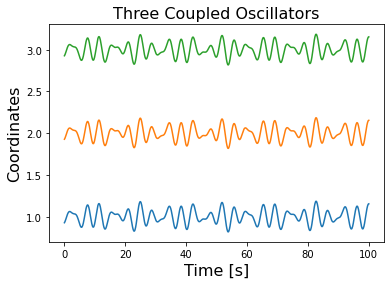

In [9]:
# PLOTTING SECTION
plt.plot(solution_3osc.t, solution_3osc.y[0] + 1*a)
plt.plot(solution_3osc.t, solution_3osc.y[0] + 2*a)
plt.plot(solution_3osc.t, solution_3osc.y[0] + 3*a)

plt.title("Three Coupled Oscillators", fontsize= 16)
plt.xlabel("Time [s]", fontsize= 16)
plt.ylabel("Coordinates", fontsize= 16)

In [12]:
ft = np.array(
    [[[om,
    integralTrapezoidal(np.array([solution_3osc.t, 1/np.sqrt(2*np.pi) * solution_3osc.y[i] * np.exp(1j * om * solution_3osc.t)]) )]
    for om in np.linspace(0,3,301)] for i in range(3)]
)

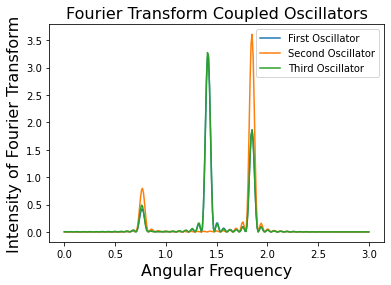

In [17]:
# PLOTTING SECTION
plt.plot(ft[0,:,0].real, abs(ft[0,:,1])**2, label="First Oscillator")
plt.plot(ft[0,:,0].real, abs(ft[1,:,1])**2, label="Second Oscillator")
plt.plot(ft[0,:,0].real, abs(ft[2,:,1])**2, label="Third Oscillator")
plt.title("Fourier Transform Coupled Oscillators", fontsize= 16)
plt.xlabel("Angular Frequency", fontsize= 16)
plt.ylabel("Intensity of Fourier Transform", fontsize= 16)
plt.legend()
plt.show()

Eigenvalues:

\begin{align} 
\omega_1 = \sqrt{\frac{k}{m}}\sqrt{2+\sqrt{2}}, \quad \omega_2 = \sqrt{\frac{k}{m}}\sqrt{2}, \quad \omega_3 = \sqrt{\frac{k}{m}}\sqrt{2-\sqrt{2}}
\end{align}

Eigenvectors:

\begin{align}
\begin{pmatrix}-\frac{1}{2}\\\frac{1}{\sqrt{2}}\\-\frac{1}{2}\end{pmatrix}\quad\quad
\begin{pmatrix}-\frac{1}{\sqrt{2}}\\0\\\frac{1}{\sqrt{2}}\end{pmatrix}\quad\quad
\begin{pmatrix}\frac{1}{2}\\\frac{1}{\sqrt{2}}\\\frac{1}{2}\end{pmatrix}
\end{align}